In [1]:
import pandas as pd
import numpy as np

## Algorithms
from sklearn import svm,tree,linear_model, neighbors,naive_bayes,ensemble,discriminant_analysis,gaussian_process

## Helpers:
from sklearn import feature_selection, model_selection, metrics
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')


## input the data

In [2]:
idtrain =  pd.read_csv("./titanicTrain.csv")
idtest = pd.read_csv("./titanicTest.csv")
idtrain.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data1 = idtrain.copy()

data_cleaner = [data1,idtest]

idtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
idtrain.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
793,794,0,1,"Hoyt, Mr. William Fisher",male,NaN,0,0,PC 17600,30.6958,NaN,C
449,450,1,1,"Peuchen, Major. Arthur Godfrey",male,52.0,0,0,113786,30.5000,C104,S
502,503,0,3,"O'Sullivan, Miss. Bridget Mary",female,NaN,0,0,330909,7.6292,NaN,Q
246,247,0,3,"Lindahl, Miss. Agda Thorilda Viktoria",female,25.0,0,0,347071,7.7750,NaN,S
409,410,0,3,"Lefebre, Miss. Ida",female,NaN,3,1,4133,25.4667,NaN,S


## Lets check for null values

In [6]:
print(idtrain.isnull().sum())
print("*"*40)
print(idtest.isnull().sum())

## there are null values in age, cabin and embarked

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
****************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [7]:
idtrain.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Ilett, Miss. Bertha",male,NaN,NaN,NaN,347082,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
for dataset in data_cleaner:    
    #complete missing age with median
    dataset['Age'].fillna(dataset['Age'].median(), inplace = True)

    #complete embarked with mode
    dataset['Embarked'].fillna(dataset['Embarked'].mode()[0], inplace = True)

    #complete missing fare with median
    dataset['Fare'].fillna(dataset['Fare'].median(), inplace = True)


## dropping the non essential columns
data1.drop(['PassengerId','Cabin','Ticket'],axis=1,inplace=True)

print(data1.isnull().sum())
print("*"*50)
print(idtest.isnull().sum())

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64
**************************************************
PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64


In [9]:
data1['Name'].str.split(",",expand=True)

,0,1
0,Braund,Mr. Owen Harris
1,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,Heikkinen,Miss. Laina
3,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,Allen,Mr. William Henry
...,...,...
886,Montvila,Rev. Juozas
887,Graham,Miss. Margaret Edith
888,Johnston,"Miss. Catherine Helen ""Carrie"""
889,Behr,Mr. Karl Howell


In [10]:
k = data1['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]
k.value_counts()

## some have occurences less than 10 times

 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Col               2
 Mlle              2
 Major             2
 Mme               1
 Don               1
 Lady              1
 the Countess      1
 Capt              1
 Jonkheer          1
 Sir               1
 Ms                1
Name: 0, dtype: int64

## Feature Engineering

In [11]:
for dataset in data_cleaner:

    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['IsAlone'] = 1
    dataset['IsAlone'].loc[dataset['FamilySize']>1] = 0
    
    ## keeping the track of Mr, Mrs and Miss among the passengers
    dataset['Title'] = dataset['Name'].str.split(",",expand=True)[1].str.split(".",expand=True)[0]

    ## distributing the fare in 4 categories using qcut
    ## qcut will try to ensure equal number of samples in each category
    dataset['FareBin'] = pd.qcut(dataset['Fare'],4)

    ## same for age but for age we will use cut method
    dataset['AgeBin'] = pd.cut(dataset['Age'].astype(int), 5)


## cleaning the rare names among the passengers
title_names = (data1['Title'].value_counts() < 10)
data1['Title'] = data1['Title'].apply(lambda x: "Misc" if title_names.loc[x]==True else x)
print(data1.Title.value_counts())
print("*"*50)




 Mr        517
 Miss      182
 Mrs       125
 Master     40
Misc        27
Name: Title, dtype: int64
**************************************************


In [12]:
print(dataset.columns)
print("*"*50)

print(idtrain.columns)
print("*"*50)

print(idtest.columns)

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'FareBin', 'AgeBin'],
      dtype='object')
**************************************************
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
**************************************************
Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'FamilySize', 'IsAlone', 'Title',
       'FareBin', 'AgeBin'],
      dtype='object')


In [13]:
dataset.info()

## name, sex, ticket,Cabin,Embark,Title,Farebin,Agebin are of object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  418 non-null    int64   
 1   Pclass       418 non-null    int64   
 2   Name         418 non-null    object  
 3   Sex          418 non-null    object  
 4   Age          418 non-null    float64 
 5   SibSp        418 non-null    int64   
 6   Parch        418 non-null    int64   
 7   Ticket       418 non-null    object  
 8   Fare         418 non-null    float64 
 9   Cabin        91 non-null     object  
 10  Embarked     418 non-null    object  
 11  FamilySize   418 non-null    int64   
 12  IsAlone      418 non-null    int64   
 13  Title        418 non-null    object  
 14  FareBin      418 non-null    category
 15  AgeBin       418 non-null    category
dtypes: category(2), float64(2), int64(6), object(6)
memory usage: 47.1+ KB


## changing the categorical datatypes

In [14]:
label = LabelEncoder()

for dataset in data_cleaner:
    dataset['Sex_Code'] = label.fit_transform(dataset['Sex'])
    dataset['Embarked_Code'] = label.fit_transform(dataset['Embarked'])
    dataset['Title_Code'] = label.fit_transform(dataset['Title'])
    dataset['AgeBin_Code'] = label.fit_transform(dataset['AgeBin'])
    dataset['FareBin_Code'] = label.fit_transform(dataset['FareBin'])

Target = ['Survived']



#define x variables for original features aka feature selection
data1_x = ['Sex','Pclass', 'Embarked', 'Title','SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone']  #pretty name/values for charts
data1_x_calc = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code','SibSp', 'Parch', 'Age', 'Fare'] #coded for algorithm calculation
data1_xy =  Target + data1_x
print('Original X Y: ', data1_xy, '\n')  


#define x variables for original w/bin features to remove continuous variables
data1_x_bin = ['Sex_Code','Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code']
data1_xy_bin = Target + data1_x_bin
print('Bin X Y: ', data1_xy_bin, '\n')


Original X Y:  ['Survived', 'Sex', 'Pclass', 'Embarked', 'Title', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone'] 

Bin X Y:  ['Survived', 'Sex_Code', 'Pclass', 'Embarked_Code', 'Title_Code', 'FamilySize', 'AgeBin_Code', 'FareBin_Code'] 



In [15]:
data1_dummy = pd.get_dummies(data1[data1_x])
data1_x_dummy=data1_dummy.columns.tolist()

data1_xy_dummy = Target + data1_x_dummy
print('Dummy X Y: ', data1_xy_dummy, '\n')


Dummy X Y:  ['Survived', 'Pclass', 'SibSp', 'Parch', 'Age', 'Fare', 'FamilySize', 'IsAlone', 'Sex_female', 'Sex_male', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'Title_ Master', 'Title_ Miss', 'Title_ Mr', 'Title_ Mrs', 'Title_Misc'] 



In [16]:
data1_dummy.head()

,Pclass,SibSp,Parch,Age,Fare,FamilySize,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Title_ Master,Title_ Miss,Title_ Mr,Title_ Mrs,Title_Misc
0,3,1,0,22.0,7.2500,2,0,0,1,0,0,1,0,0,1,0,0
1,1,1,0,38.0,71.2833,2,0,1,0,1,0,0,0,0,0,1,0
2,3,0,0,26.0,7.9250,1,1,1,0,0,0,1,0,1,0,0,0
3,1,1,0,35.0,53.1000,2,0,1,0,0,0,1,0,0,0,1,0
4,3,0,0,35.0,8.0500,1,1,0,1,0,0,1,0,0,1,0,0


In [17]:
## lets double check this

print(data1.isnull().sum())
data1.info()


Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             0
Embarked         0
FamilySize       0
IsAlone          0
Title            0
FareBin          0
AgeBin           0
Sex_Code         0
Embarked_Code    0
Title_Code       0
AgeBin_Code      0
FareBin_Code     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Survived       891 non-null    int64   
 1   Pclass         891 non-null    int64   
 2   Name           891 non-null    object  
 3   Sex            891 non-null    object  
 4   Age            891 non-null    float64 
 5   SibSp          891 non-null    int64   
 6   Parch          891 non-null    int64   
 7   Fare           891 non-null    float64 
 8   Embarked       891 non-null    object  
 9   FamilySize     891 no

In [18]:
idtest.isnull().sum()
## idtest has null values in cabin column

PassengerId        0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            327
Embarked           0
FamilySize         0
IsAlone            0
Title              0
FareBin            0
AgeBin             0
Sex_Code           0
Embarked_Code      0
Title_Code         0
AgeBin_Code        0
FareBin_Code       0
dtype: int64

## Exploratory Analysis with Stats

In [19]:
for x in data1_x:
    if data1[x].dtype != 'float64':
        print(data1[[x,Target[0]]].groupby(x,as_index=False).mean())
        print("*"*50)

print("*"*50)
print(pd.crosstab(data1['Title'],data1[Target[0]]))


      Sex  Survived
0  female  0.742038
1    male  0.188908
**************************************************
   Pclass  Survived
0       1  0.629630
1       2  0.472826
2       3  0.242363
**************************************************
  Embarked  Survived
0        C  0.553571
1        Q  0.389610
2        S  0.339009
**************************************************
     Title  Survived
0   Master  0.575000
1     Miss  0.697802
2       Mr  0.156673
3      Mrs  0.792000
4     Misc  0.444444
**************************************************
   SibSp  Survived
0      0  0.345395
1      1  0.535885
2      2  0.464286
3      3  0.250000
4      4  0.166667
5      5  0.000000
6      8  0.000000
**************************************************
   Parch  Survived
0      0  0.343658
1      1  0.550847
2      2  0.500000
3      3  0.600000
4      4  0.000000
5      5  0.200000
6      6  0.000000
**************************************************
   FamilySize  Survived
0           1  0

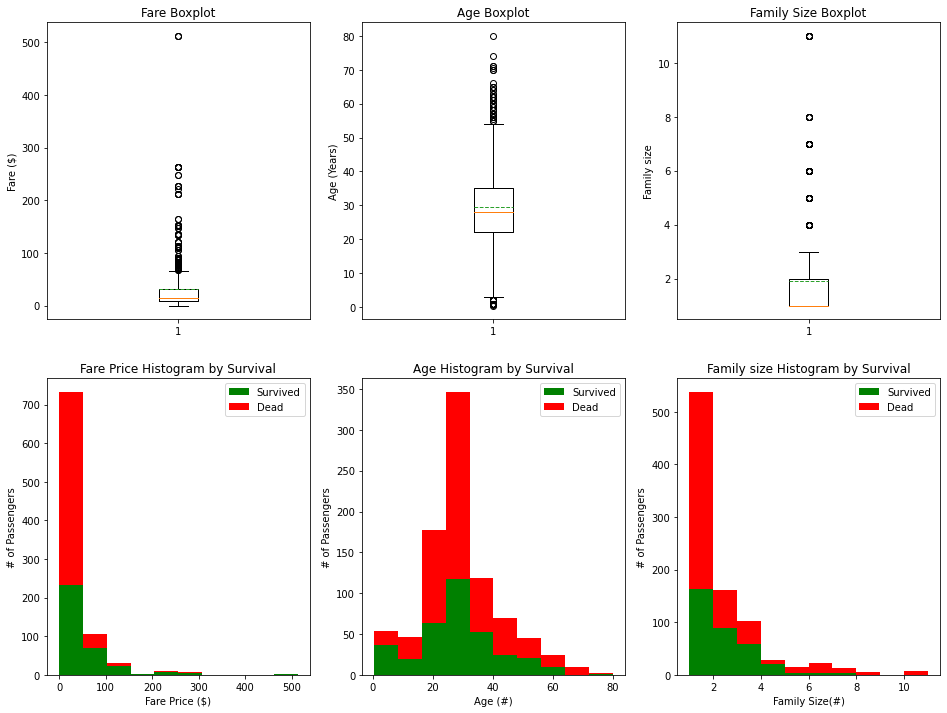

In [20]:
plt.figure(figsize=[16,12])

plt.subplot(231)
plt.boxplot(x=data1['Fare'],showmeans = True, meanline = True)
plt.title('Fare Boxplot')
plt.ylabel('Fare ($)')


plt.subplot(232)
plt.boxplot(x=data1['Age'], showmeans = True, meanline = True)
plt.title('Age Boxplot')
plt.ylabel('Age (Years)')


plt.subplot(233)
plt.boxplot(x=data1['FamilySize'], showmeans = True, meanline = True)
plt.title('Family Size Boxplot')
plt.ylabel('Family size')

plt.subplot(234)
plt.hist([data1[data1['Survived']==1]['Fare'],data1[data1['Survived']==0]['Fare']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Fare Price Histogram by Survival')
plt.xlabel('Fare Price ($)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(235)
plt.hist([data1[data1['Survived']==1]['Age'],data1[data1['Survived']==0]['Age']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Age Histogram by Survival')
plt.xlabel('Age (#)')
plt.ylabel('# of Passengers')
plt.legend()

plt.subplot(236)
plt.hist([data1[data1['Survived']==1]['FamilySize'],data1[data1['Survived']==0]['FamilySize']],stacked=True,color=['g','r'],label=['Survived','Dead'])
plt.title('Family size Histogram by Survival')
plt.xlabel('Family Size(#)')
plt.ylabel('# of Passengers')
plt.legend()

<AxesSubplot:xlabel='FamilySize', ylabel='Survived'>

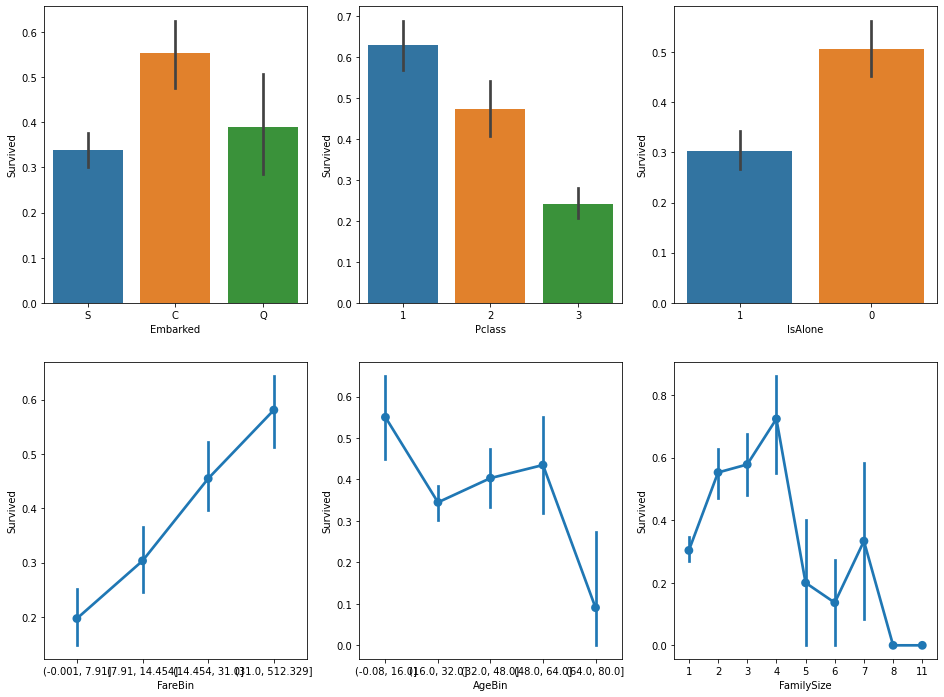

In [21]:
## Bar Plots

fig,axis = plt.subplots(2,3, figsize=(16,12))
sns.barplot(x='Embarked',y='Survived',data=data1,ax = axis[0,0])
sns.barplot(x='Pclass',y='Survived',data=data1,order=[1,2,3],ax = axis[0,1])
sns.barplot(x='IsAlone',y='Survived',data=data1,order=[1,0],ax = axis[0,2])


sns.pointplot(x = 'FareBin', y = 'Survived',  data=data1, ax = axis[1,0])
sns.pointplot(x = 'AgeBin', y = 'Survived',  data=data1, ax = axis[1,1])
sns.pointplot(x = 'FamilySize', y = 'Survived', data=data1, ax = axis[1,2])

Text(0.5, 1.0, 'Pclass vs Family Size Survival Comparison')

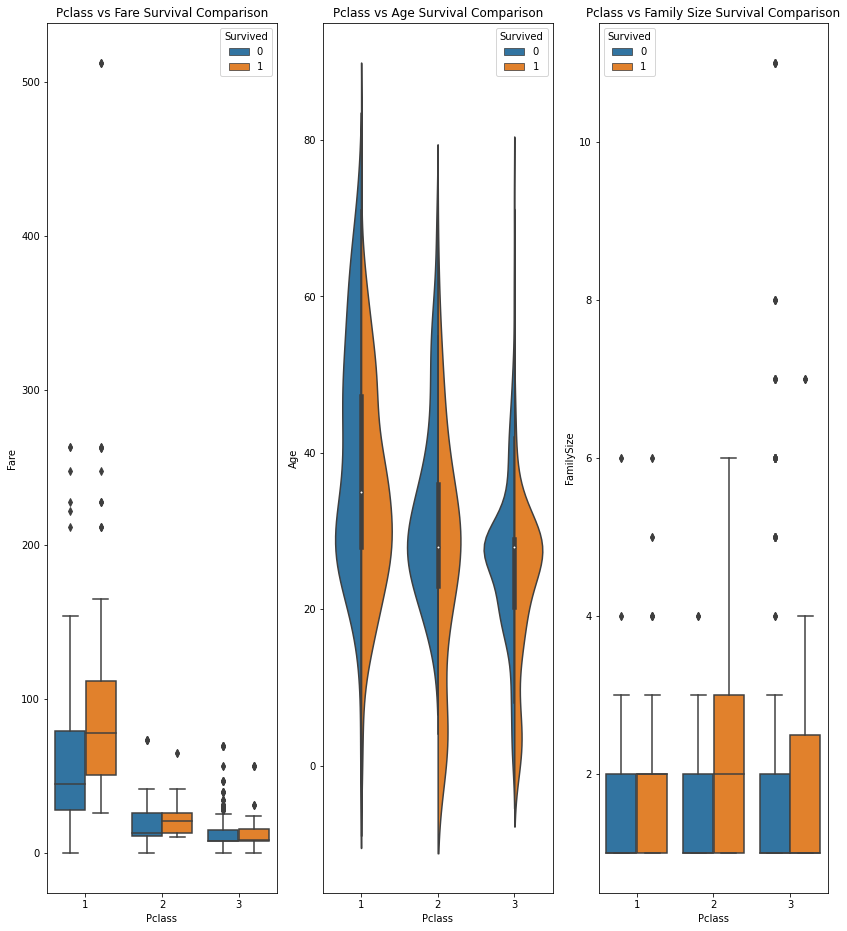

In [22]:
## its clearly evident that class mattered in the survival thing
## lets compare the class with other features

fig, (axis1,axis2,axis3) = plt.subplots(1,3,figsize=(14,16))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=data1,ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived',split=True,data=data1,ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

sns.boxplot(x = 'Pclass', y ='FamilySize', hue = 'Survived', data = data1, ax = axis3)
axis3.set_title('Pclass vs Family Size Survival Comparison')

Text(0.5, 1.0, 'Sex vs IsAlone Survival Comparison')

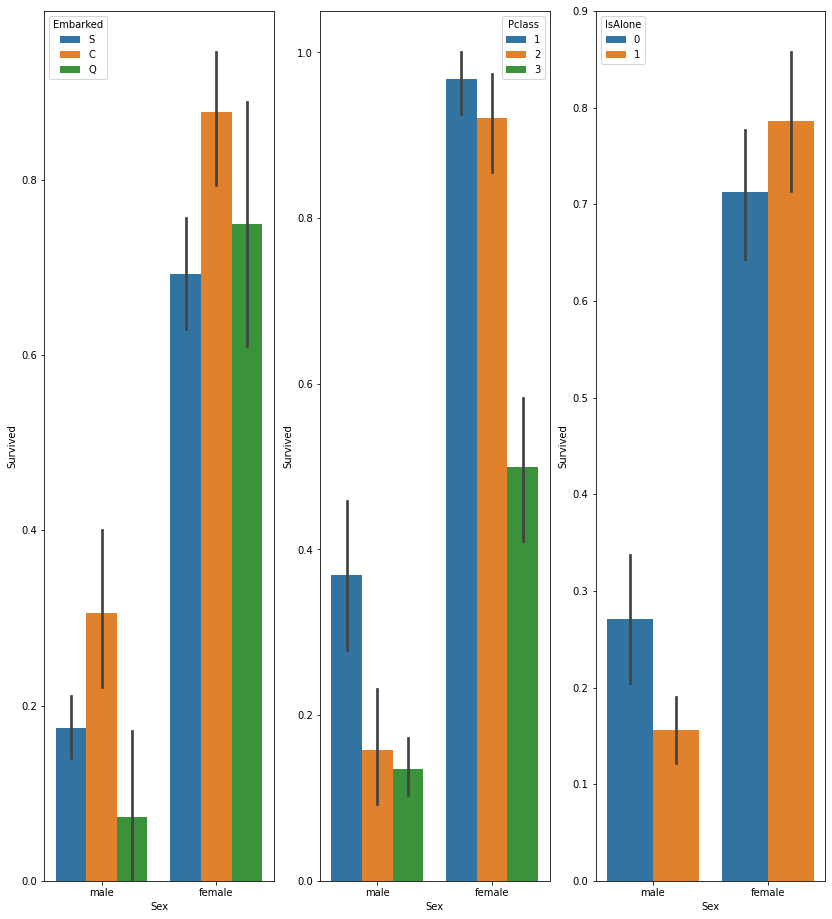

In [23]:
## Sex also mattered in that thing
## so lets compare the sex with other things

fig,qaxis = plt.subplots(1,3,figsize=(14,16))

sns.barplot(x='Sex',y='Survived',hue='Embarked',data=data1,ax=qaxis[0])
axis1.set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex',y='Survived',hue='Pclass',data=data1,ax=qaxis[1])
axis1.set_title('Sex vs Pclass Survival Comparison')

sns.barplot(x='Sex',y='Survived',hue='IsAlone',data=data1,ax=qaxis[2])
axis1.set_title('Sex vs IsAlone Survival Comparison')


<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

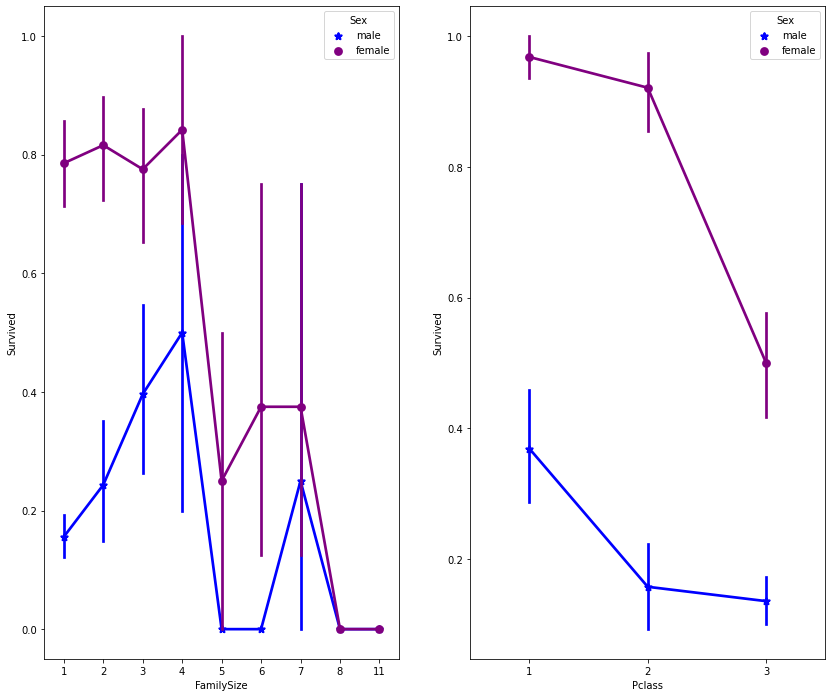

In [24]:
## family size factor with sex and survival compare

fig,qaxis = plt.subplots(1,2,figsize=(14,12))

sns.pointplot(x='FamilySize',y='Survived',hue='Sex',data=data1,
                palette={"male":"blue","female":"purple"},markers=['*','o'],
                linestyle=['-','--'],ax=qaxis[0])


sns.pointplot(x='Pclass',y='Survived',hue='Sex',data=data1,
                palette={"male":"blue","female":"purple"},markers=['*','o'],
                linestyle=['-','--'],ax=qaxis[1])



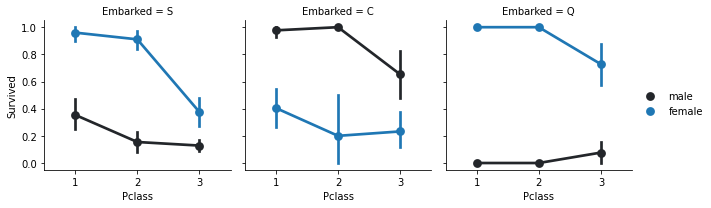

In [25]:


## embark with all other factors 
e = sns.FacetGrid(data1,col='Embarked')
e.map(sns.pointplot,'Pclass','Survived','Sex',)
e.add_legend()

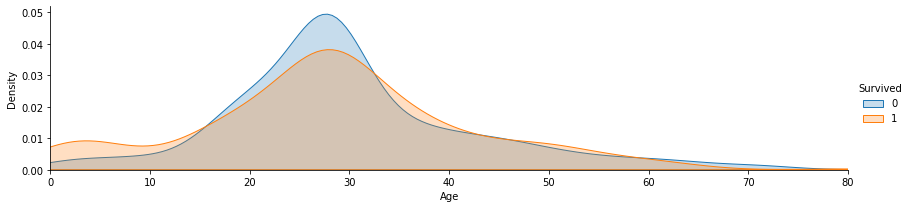

In [26]:
## age vs who survived or not

a = sns.FacetGrid(data1,hue='Survived',aspect=4,xlim=[0,data1['Age'].max()])
a.map(sns.kdeplot,'Age',shade=True)
a.add_legend()

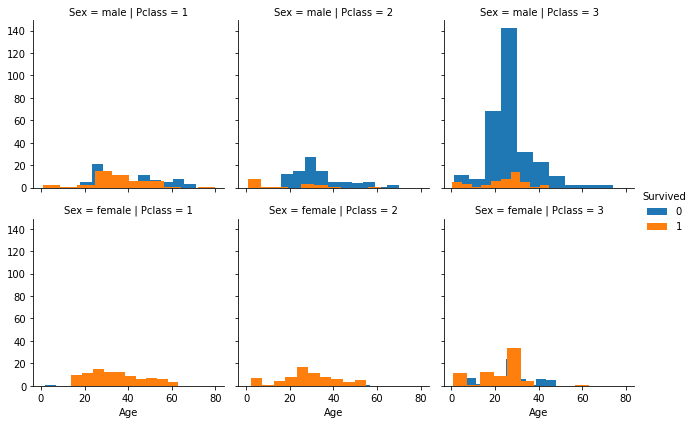

In [27]:
## histo comparison of age,class and sex

h = sns.FacetGrid(data1,row='Sex',col='Pclass',hue='Survived')
h.map(plt.hist,'Age')
h.add_legend()

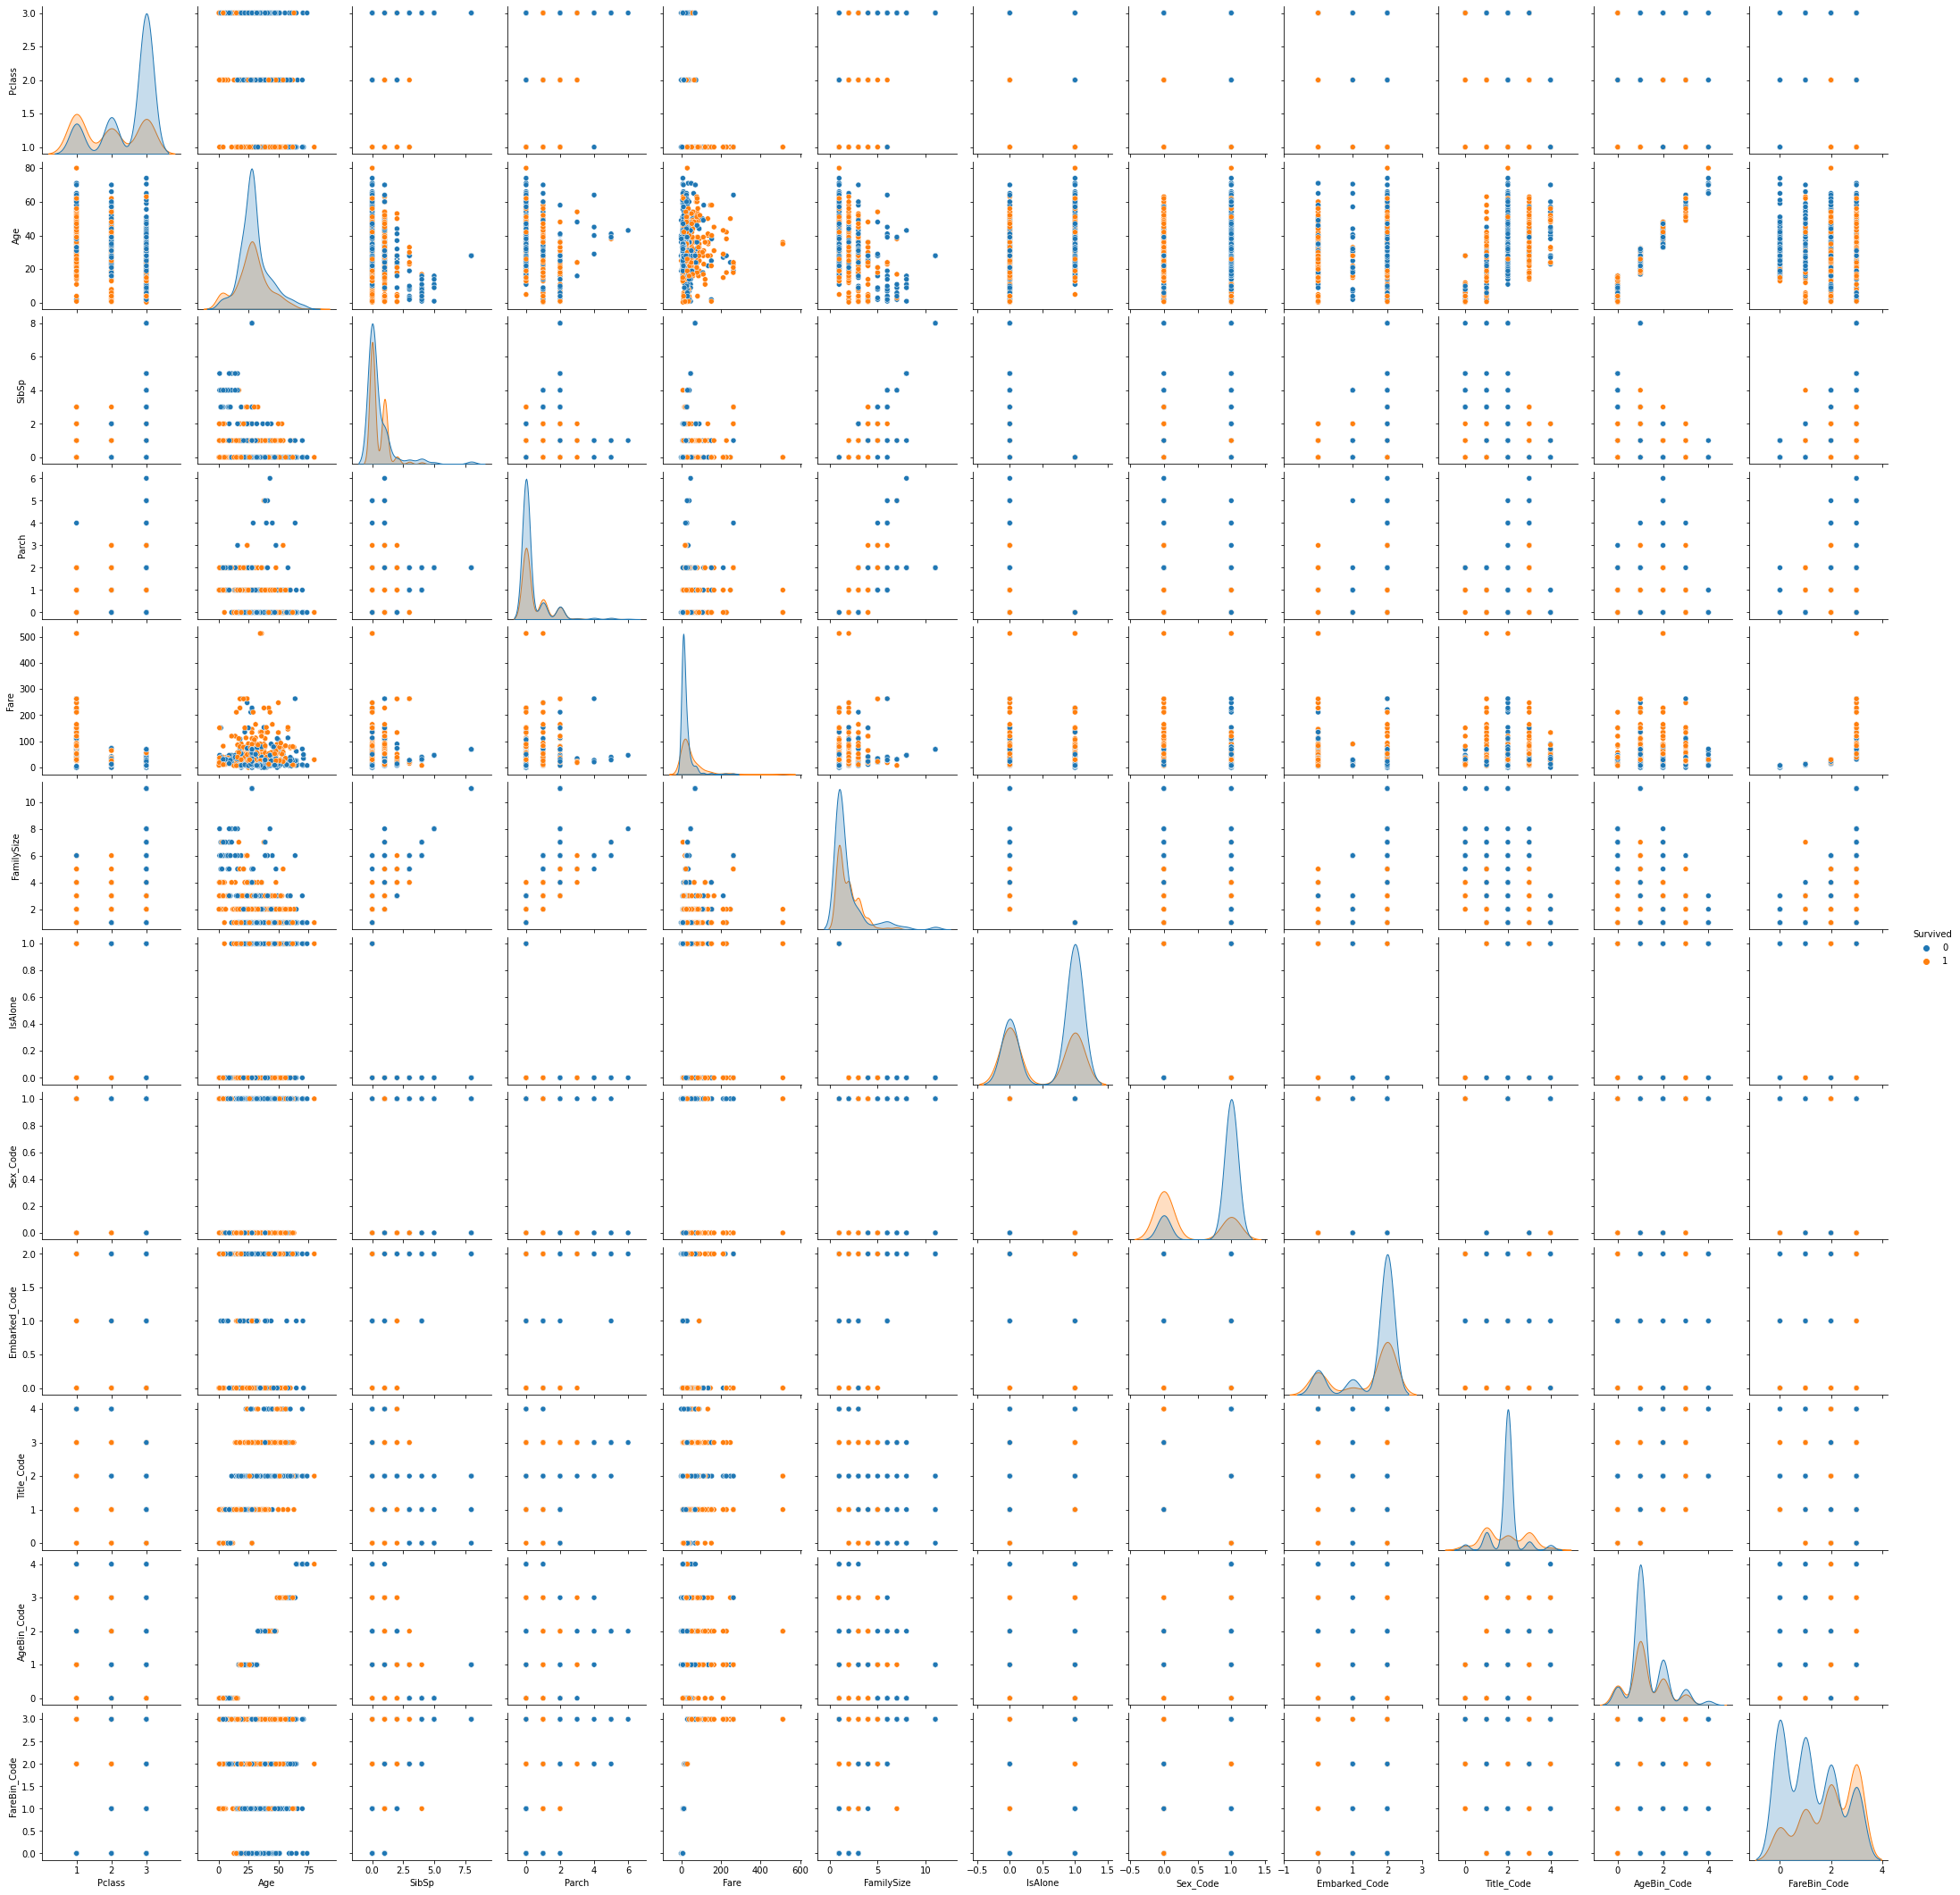

In [28]:
## Pair plots
pp = sns.pairplot(data1,hue='Survived',diag_kind='kde')

<AxesSubplot:>

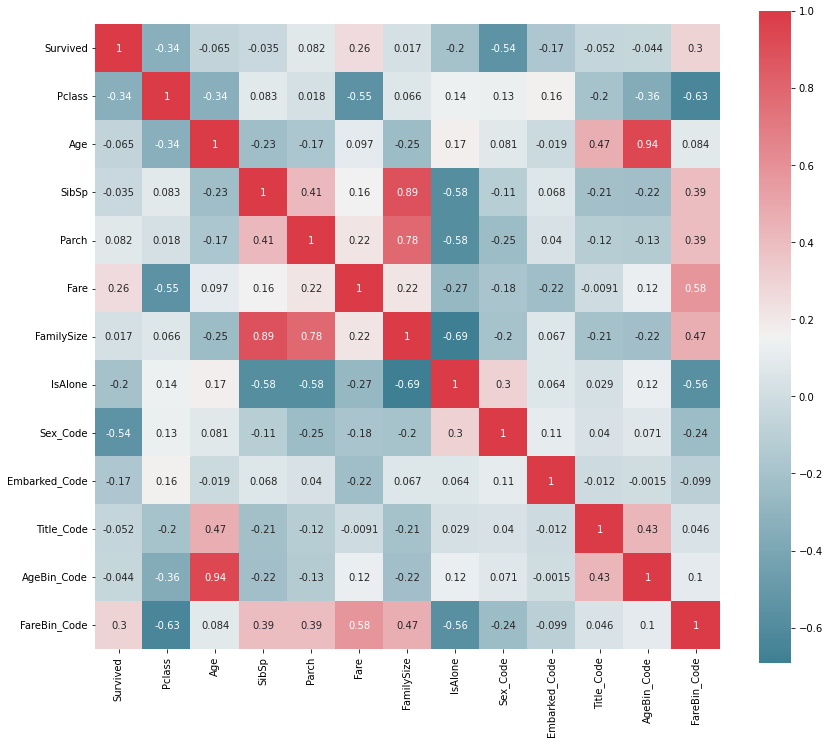

In [29]:
## heatmap

fig,ax = plt.subplots(figsize=(14,12))
colormap = sns.diverging_palette(220, 10, as_cmap = True)
sns.heatmap(data1.corr(),annot=True,square=True,ax=ax,linecolor='white',cmap=colormap)